test for properly reading null data as missing from the met file.

In [1]:
using Revise
using Pkg; Pkg.activate(".")

using Dates
using Printf # sprintf used in readers
using PyPlot

# general PSL DAS readers
include("./readers.jl")
using .NoaaDas

  Activating project at `~/Projects/ASTRAL/mast`


In [2]:
# utility functions
m2n(x) = ismissing(x) ? NaN : x
pd = permutedims


permutedims (generic function with 13 methods)

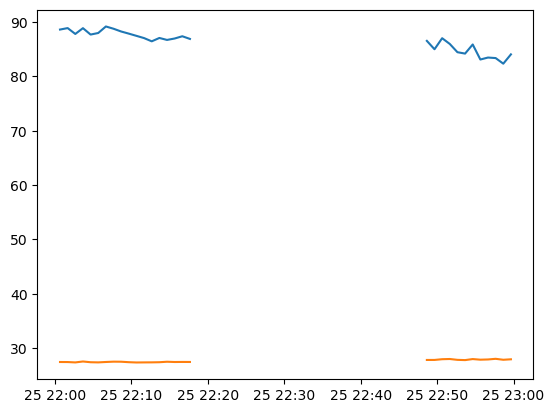

12-element Vector{Union{Missing, Float32}}:
 88.6146f0
 87.9804f0
 87.4555f0
 86.9694f0
   missing
   missing
   missing
   missing
   missing
   missing
 87.0229f0
 83.1015f0

In [3]:
# look at a case
# keys for me1 format

me1keys = [:time, :Batt_Volt, :PTemp, :ORG_Car_v, :ORG_Sig_v, :ORG_mmhr, :airflow, :No_data, :No_data, :Tair, :RH, :Std_Dev_airflow]
D = read_das_dict(get_das_pathfiles("me1", DateTime(2024,5,25,22)),me1keys)

clf()
plot(D[:time], m2n.(D[:RH]))
plot(D[:time], m2n.(D[:Tair]))
D[:RH][1:5:end]